<h1> CodSoft : Machine Learning Internship</h1>

<p>
<h3 ><b>Project Name : </b>Fraud Detection for Financial Transactions</h3> 
<h4>Problem Statment : <b>Predict if this transaction are fraud or not</b></h4>
</p>

In [1]:
# let's import libraries in the first
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
df = pd.read_csv('fraudTrain.csv' , index_col=False)
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,45.5165,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.info()
# trans_date_trans_time : date(month , year , days) , time
#  dob : date
# unix_time : date or time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

<h3>Data Preprocessing</h3>
<ul>
<li>data cleaning</li>
<li>data integration</li>
<li>data transformation</li>
<li>data reduction</li>
</ul>

In [5]:
df['is_fraud'].value_counts()
# data are imbalanced

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

In [6]:
# Convert the 'trans_date_trans_time' column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Extract hour of the day
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour

# Extract day of the week
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Extract month of the transaction
df['month_of_transaction'] = df['trans_date_trans_time'].dt.month

# Create time of day segments
df['time_of_day_segment'] = pd.cut(df['trans_date_trans_time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening']).astype('object')

# Create a binary feature for weekend vs. weekday
df['weekend'] = df['trans_date_trans_time'].dt.dayofweek 

# Calculate transaction frequency for each customer within a day
df['transactions_per_day'] = df.groupby(['trans_num', df['trans_date_trans_time'].dt.date])['trans_date_trans_time'].transform('count')


In [7]:
df.isna().sum()

trans_date_trans_time        0
cc_num                       0
merchant                     0
category                     0
amt                          0
first                        0
last                         0
gender                       0
street                       0
city                         0
state                        0
zip                          0
lat                          0
long                         0
city_pop                     0
job                          0
dob                          0
trans_num                    0
unix_time                    0
merch_lat                    0
merch_long                   0
is_fraud                     0
hour_of_day                  0
day_of_week                  0
month_of_transaction         0
time_of_day_segment      34412
weekend                      0
transactions_per_day         0
dtype: int64

In [8]:
df['hour_of_day'] = df['hour_of_day'].astype('int')
df['weekend'] = df['weekend'].astype('int')
df['month_of_transaction'] = df['month_of_transaction'].astype('int')

In [9]:
def get_cat_num_col(num_col , cat_col , data) : 
    for col in data.columns: 
        if data[col].dtype in ['int64' , 'float64' ,'int' , 'float']  : 
            num_col.append(col)
        else :
            cat_col.append(col)

num_col = []
cat_col = []
get_cat_num_col(num_col , cat_col,df)
num_col

['cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'hour_of_day',
 'month_of_transaction',
 'weekend',
 'transactions_per_day']

In [10]:
cat_col

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num',
 'day_of_week',
 'time_of_day_segment']

In [11]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan , strategy='most_frequent' , copy=True)
datal = im.fit_transform(df[cat_col])
im = SimpleImputer(missing_values=np.nan , strategy='mean' , copy=True)
datan = im.fit_transform(df[num_col])

In [12]:
datal = pd.DataFrame(datal , columns = cat_col)
datan = pd.DataFrame(datan , columns = num_col)
df_new = pd.concat([datan , datal] , axis = 1)
csv = df_new.to_csv('preprocessed_credit_card_fraud_detection_part1.csv' , index= False)
csv

<h2>Balancing data</h2>

In [13]:
df = pd.read_csv('preprocessed_credit_card_fraud_detection_part1.csv')
df.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,last,gender,street,city,state,job,dob,trans_num,day_of_week,time_of_day_segment
0,2.703190e+15,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,...,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,Tuesday,Afternoon
1,6.304230e+11,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,...,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,Tuesday,Afternoon
2,3.885950e+13,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,...,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,Tuesday,Afternoon
3,3.534090e+15,45.00,59632.0,45.5165,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,...,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,Tuesday,Afternoon
4,3.755340e+14,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,...,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,Tuesday,Afternoon


In [14]:
df.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour_of_day',
       'month_of_transaction', 'weekend', 'transactions_per_day',
       'trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num',
       'day_of_week', 'time_of_day_segment'],
      dtype='object')

In [15]:
df['is_fraud'].value_counts()

is_fraud
0.0    1042569
1.0       6006
Name: count, dtype: int64

In [16]:
df.isna().sum()

cc_num                   0
amt                      0
zip                      0
lat                      0
long                     0
city_pop                 0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour_of_day              0
month_of_transaction     0
weekend                  0
transactions_per_day     0
trans_date_trans_time    0
merchant                 0
category                 0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
job                      0
dob                      0
trans_num                0
day_of_week              0
time_of_day_segment      0
dtype: int64

In [17]:
X = df.drop('is_fraud' , axis = 1)
y=df['is_fraud']

In [18]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=42)
X_ros , y_ros = ros.fit_resample(X,y)
X_ros.shape

(12012, 27)

In [19]:
y_ros.value_counts()

is_fraud
0.0    6006
1.0    6006
Name: count, dtype: int64

In [20]:
undersample_data = pd.DataFrame(data = X_ros ,columns=X.columns)
undersample_data['is_fraud'] = y_ros
output_file = 'undersampled_data_credit_card_fraud_detection_part2.csv'
undersample_data.to_csv(output_file , index =False)
print('Undersample data has been saved to {output_file} .')

Undersample data has been saved to {output_file} .


<h2>Feature Engineering</h2>

<h3>Convert categorical data into numeric</h3>

In [21]:
df = pd.read_csv(output_file)
df

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour_of_day,...,gender,street,city,state,job,dob,trans_num,day_of_week,time_of_day_segment,is_fraud
0,4.089100e+18,7.53,75662.0,32.3836,-94.8653,24536.0,1.350066e+09,32.202008,-94.371865,18.0,...,F,686 Linda Rest,Kilgore,TX,Multimedia programmer,1983-10-14,d313353fa30233e5fab5468e852d22fc,Saturday,Afternoon,0.0
1,4.247920e+12,3.79,43160.0,39.5370,-83.4550,22305.0,1.327065e+09,39.156673,-82.930503,13.0,...,F,46297 Benjamin Plains Suite 703,Washington Court House,OH,Television floor manager,1939-03-09,88c65b4e1585934d578511e627fe3589,Sunday,Afternoon,0.0
2,4.026220e+12,59.07,6365.0,41.5224,-71.9934,4720.0,1.332613e+09,41.657152,-72.595751,18.0,...,F,204 Ashley Neck Apt. 169,Preston,CT,Broadcast presenter,1977-05-18,3bd9ede04b5c093143d5e5292940b670,Sunday,Afternoon,0.0
3,4.957920e+12,25.58,80824.0,39.6171,-102.4776,207.0,1.361805e+09,39.080346,-103.213452,15.0,...,M,0547 Russell Ford Suite 574,Kirk,CO,Network engineer,1955-12-04,19e16ee7a01d229e750359098365e321,Tuesday,Afternoon,0.0
4,4.178100e+15,84.96,49101.0,41.9488,-86.4913,3104.0,1.331076e+09,42.502065,-86.732664,23.0,...,F,639 Cruz Islands,Baroda,MI,"Horticulturist, commercial",1981-03-29,a0c8641ca1f5d6e243ed5a2246e66176,Wednesday,Evening,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,3.589290e+15,690.49,57374.0,43.7557,-97.5936,343.0,1.362888e+09,43.254214,-98.267759,3.0,...,F,350 Stacy Glens,Spencer,SD,"Development worker, international aid",1972-03-05,fb1ddd251bbec9b84c9755e856d51723,Tuesday,Night,1.0
12008,3.546670e+15,324.74,76008.0,32.7004,-97.6039,13602.0,1.362890e+09,33.607221,-97.996506,4.0,...,M,1626 Susan Course,Aledo,TX,Optometrist,1984-07-05,4dca0549e43b7e265cae7fd8a7e563b4,Tuesday,Night,1.0
12009,3.589290e+15,331.33,57374.0,43.7557,-97.5936,343.0,1.362892e+09,44.228731,-98.330520,4.0,...,F,350 Stacy Glens,Spencer,SD,"Development worker, international aid",1972-03-05,d18c55035998e461aa9040e254b74925,Tuesday,Night,1.0
12010,3.589290e+15,356.20,57374.0,43.7557,-97.5936,343.0,1.362904e+09,43.988931,-97.989985,8.0,...,F,350 Stacy Glens,Spencer,SD,"Development worker, international aid",1972-03-05,bdaeb5e3413a408d7e6c3720a35337d5,Tuesday,Morning,1.0


In [22]:
df.columns

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'hour_of_day', 'month_of_transaction',
       'weekend', 'transactions_per_day', 'trans_date_trans_time', 'merchant',
       'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job',
       'dob', 'trans_num', 'day_of_week', 'time_of_day_segment', 'is_fraud'],
      dtype='object')

In [23]:
# useless columns : 'cc_num' , 'trans_date_trans_time' ,'first', 'last','street' , 'trans_num' 
new_df = df.drop([ 'cc_num' , 'trans_date_trans_time' ,'first', 'last','street' , 'trans_num' ] , axis = 1)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12012 entries, 0 to 12011
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amt                   12012 non-null  float64
 1   zip                   12012 non-null  float64
 2   lat                   12012 non-null  float64
 3   long                  12012 non-null  float64
 4   city_pop              12012 non-null  float64
 5   unix_time             12012 non-null  float64
 6   merch_lat             12012 non-null  float64
 7   merch_long            12012 non-null  float64
 8   hour_of_day           12012 non-null  float64
 9   month_of_transaction  12012 non-null  float64
 10  weekend               12012 non-null  float64
 11  transactions_per_day  12012 non-null  float64
 12  merchant              12012 non-null  object 
 13  category              12012 non-null  object 
 14  gender                12012 non-null  object 
 15  city               

In [25]:
from datetime import datetime
new_df['dob'] = pd.to_datetime(new_df['dob'])
current_date = datetime.now()
new_df['user_age'] = (current_date - new_df['dob']).dt.days // 365

In [26]:
# Assuming 'user_age' is the column containing the calculated age of each user
# Define age groups
age_groups = {
    'young_adults': (18, 35),
    'middle_aged_adults': (36, 55),
    'seniors': (56, 100)  # Assuming maximum age as 100 for simplicity
}

# Function to determine age group based on age
def get_age_group(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age <= upper:
            return group
    return 'unknown'
# Apply functions to the DataFrame
new_df['observed_age_group'] = new_df['user_age'].apply(get_age_group)


In [27]:
new_df['observed_age_group'].value_counts()

observed_age_group
middle_aged_adults    4825
seniors               4540
young_adults          2647
Name: count, dtype: int64

In [28]:
new_df.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'hour_of_day', 'month_of_transaction', 'weekend',
       'transactions_per_day', 'merchant', 'category', 'gender', 'city',
       'state', 'job', 'dob', 'day_of_week', 'time_of_day_segment', 'is_fraud',
       'user_age', 'observed_age_group'],
      dtype='object')

In [29]:
new_df = new_df.drop(['dob' , 'transactions_per_day'] , axis = 1)

In [30]:
cat_col = []
num_col = []
get_cat_num_col(num_col , cat_col , new_df) 
cat_col

['merchant',
 'category',
 'gender',
 'city',
 'state',
 'job',
 'day_of_week',
 'time_of_day_segment',
 'observed_age_group']

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cat_col :
    new_df[x] = le.fit_transform(new_df[x]).astype(int)


X = new_df.drop('is_fraud' , axis = 1)
y= new_df['is_fraud']

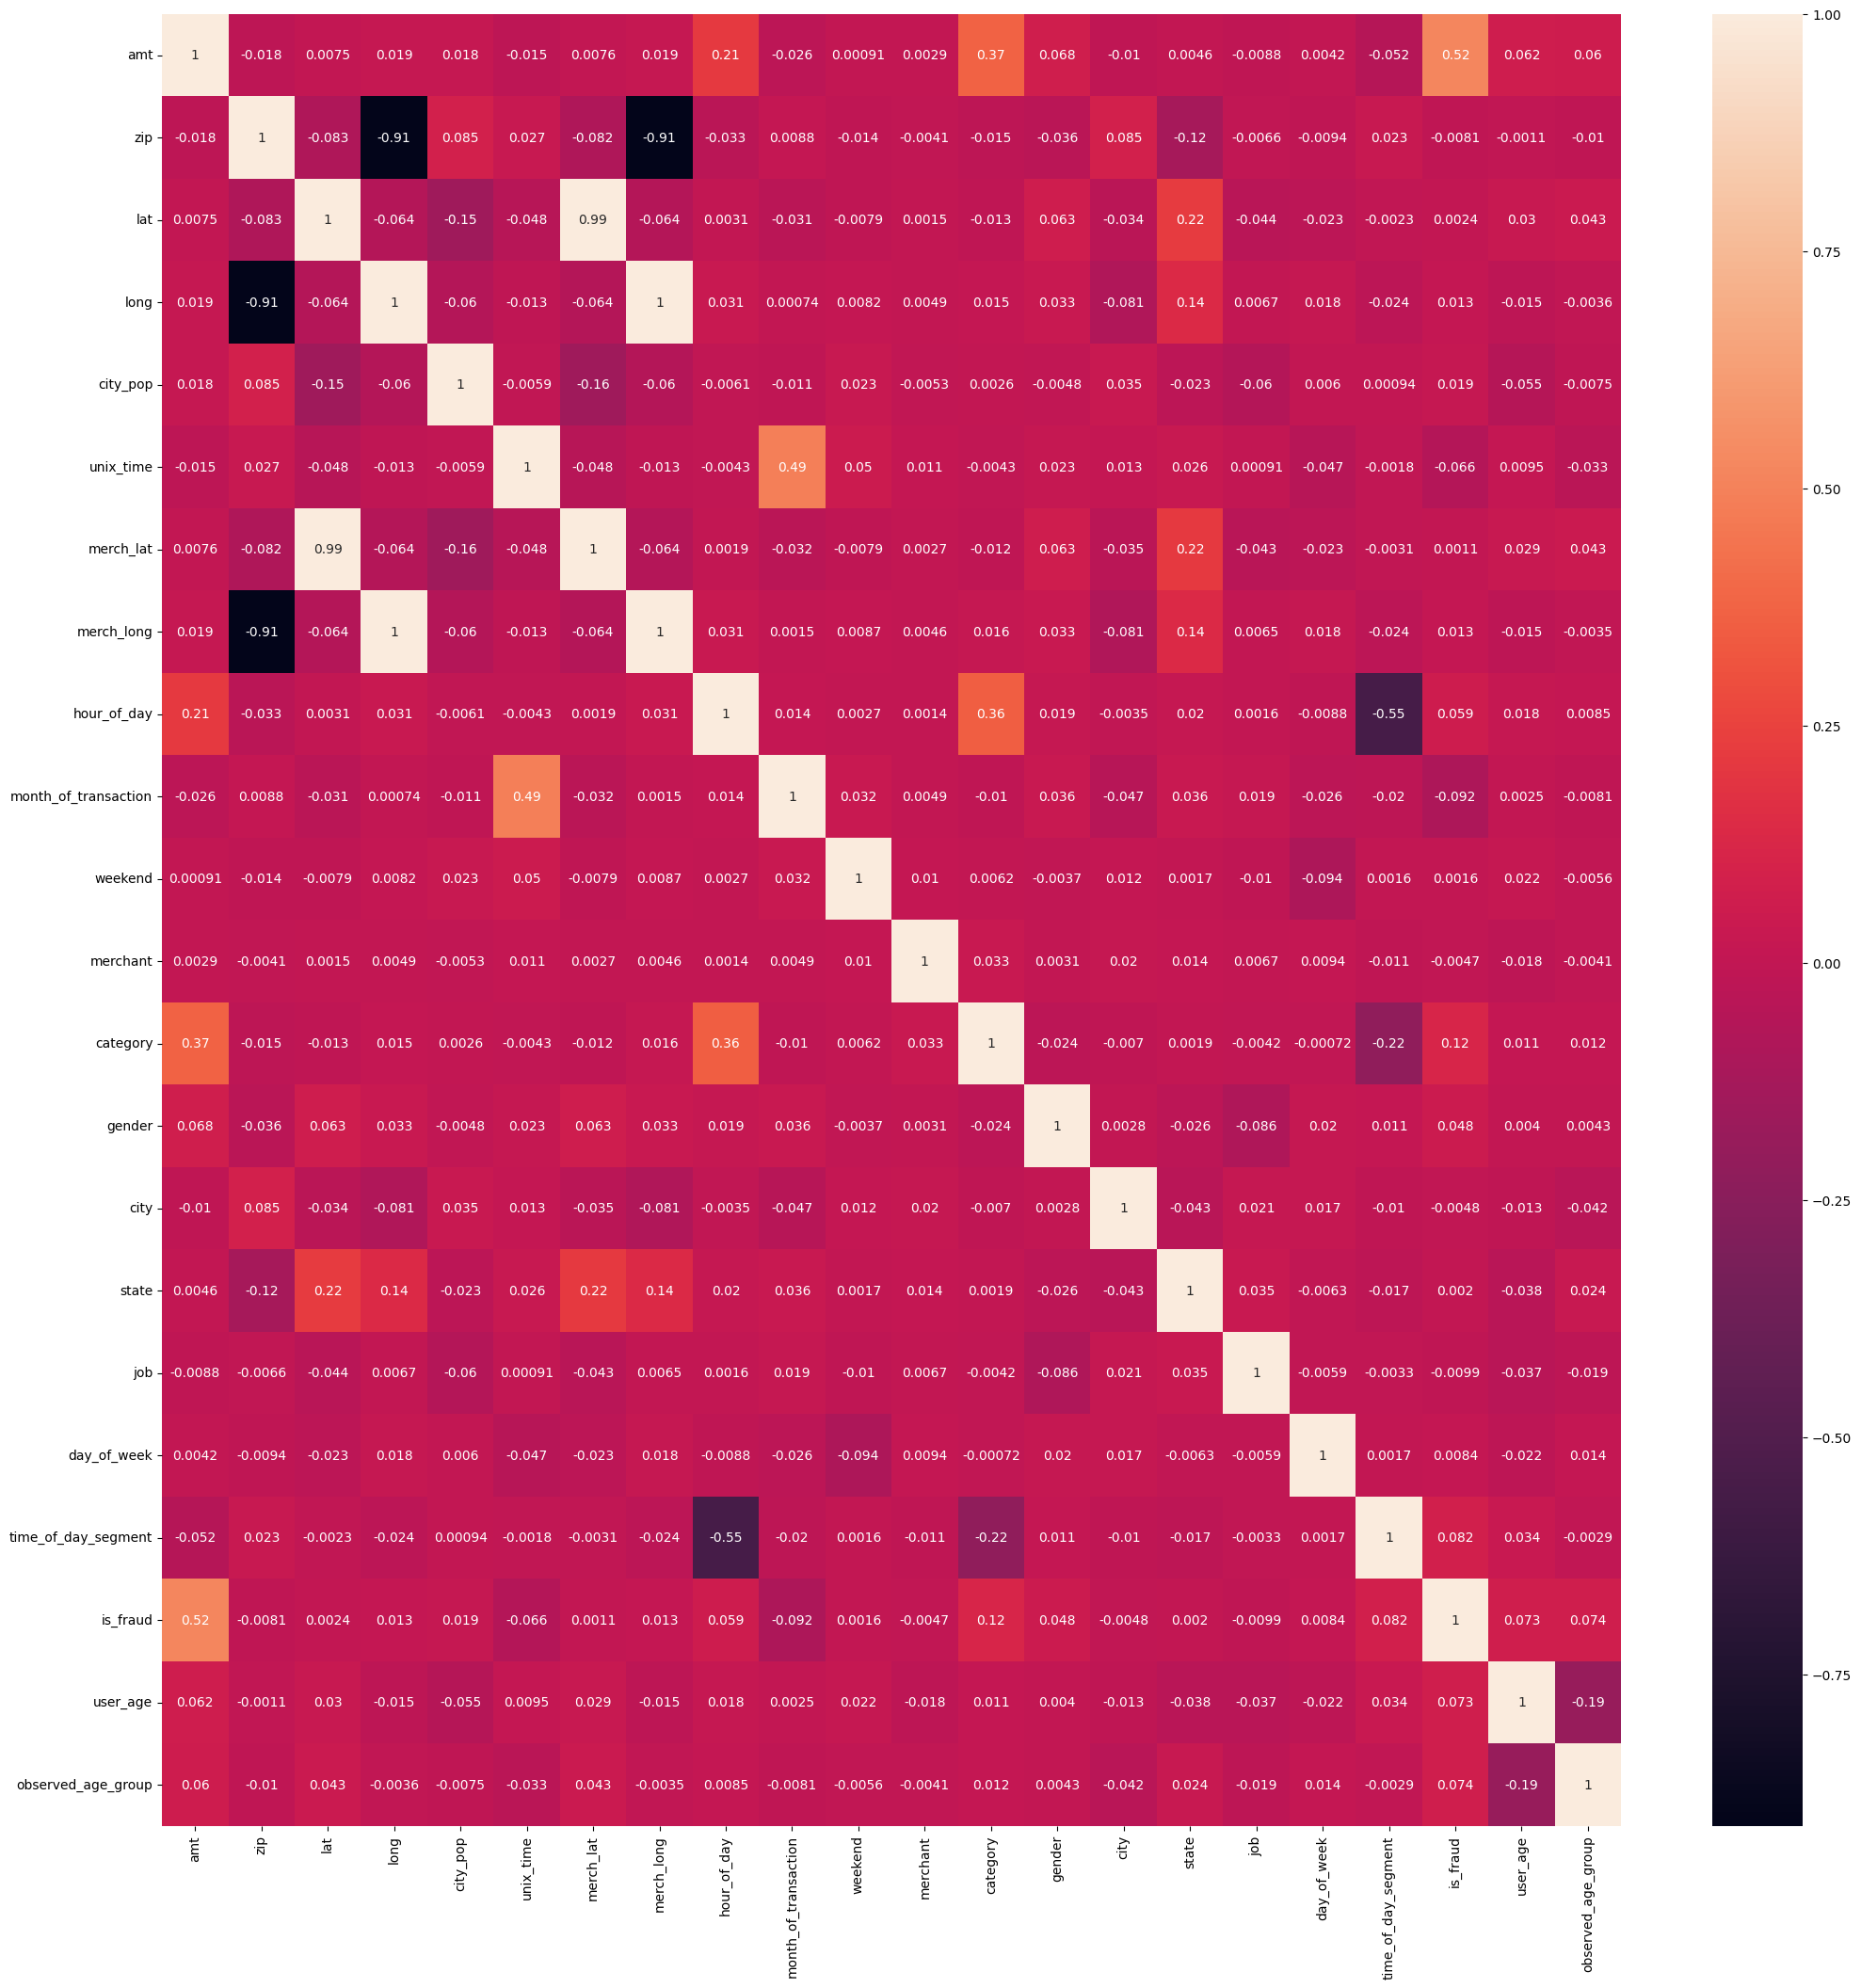

In [33]:
# check corr
fig , ax = plt.subplots(figsize = (25,25))
sns.heatmap(new_df.corr() , annot=True , ax=ax)
plt.show()

In [34]:
# long & merch_long strong inverse with zip
# merch lat strong with lat
# merch long have strong with long
# month of transaction with strong with unix time
# category have strong with amt & hour of day
# time_of_day_segment have inverse strong with hour_of_day
# is_fraud strong with amt

In [35]:
cor = new_df.corr()
cor_target = abs(cor['is_fraud'])
relevant_features = cor_target[cor_target > 0.06]
relevant_features

amt                     0.515766
unix_time               0.066274
month_of_transaction    0.092132
category                0.116975
time_of_day_segment     0.082077
is_fraud                1.000000
user_age                0.072639
observed_age_group      0.073752
Name: is_fraud, dtype: float64

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(X , y)
importances = ec.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for i , index in enumerate(sorted_indices) :
    print(f"{i+1}- {X.columns[index]} : {importances[index]}")


1- amt : 0.3169950143798638
2- hour_of_day : 0.1625728529741717
3- category : 0.07166472182216267
4- time_of_day_segment : 0.06784265826328285
5- user_age : 0.0320667829682675
6- unix_time : 0.030065645093892087
7- month_of_transaction : 0.027626967920345157
8- city : 0.024173673004291865
9- job : 0.024089263580517682
10- city_pop : 0.022391210071107667
11- lat : 0.022211756771478578
12- merch_lat : 0.021699737651126812
13- merch_long : 0.021594381900546827
14- state : 0.02128557452869063
15- zip : 0.021071783139672805
16- long : 0.020946431726399175
17- observed_age_group : 0.02063681421086262
18- weekend : 0.019436339912272626
19- merchant : 0.01925155081194002
20- day_of_week : 0.018037406811205813
21- gender : 0.014339432457901086


In [37]:
new_df.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'hour_of_day', 'month_of_transaction', 'weekend',
       'merchant', 'category', 'gender', 'city', 'state', 'job', 'day_of_week',
       'time_of_day_segment', 'is_fraud', 'user_age', 'observed_age_group'],
      dtype='object')

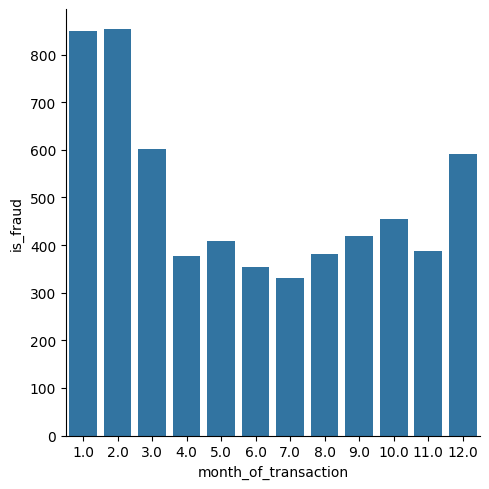

In [52]:
months_vs_frauds_cases_per_cateogry = new_df.groupby(['month_of_transaction'])['is_fraud'].sum().reset_index()
months_vs_frauds_cases_per_cateogry.sort_values(by='is_fraud' , ascending=False , inplace=True)
sns.catplot(x='month_of_transaction', y='is_fraud' ,kind='bar' ,data=months_vs_frauds_cases_per_cateogry)
plt.show()

# it show the top number of months that have high number of frauds :
#  1 ,2 ,3 ,12 

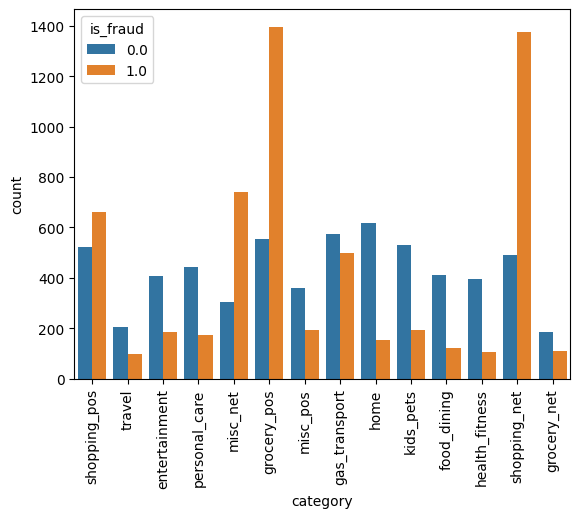

In [91]:
#categories that have frauds cases
sns.countplot(x=df['category'] ,hue=df['is_fraud'] )
plt.xticks(rotation=90)
plt.show()
# it show cateogries like : 4 ,8  ,11 ,12 have high number of frauds this mean these categories are have low security
# this mean categories like :Grocey_pos , misc_net , Shopping_pos , shopping_net have low security

In [72]:
# look at city , city_pop , isfraud cases
# fig, ax = plt.subplots(figsize=(10 , 10))
crosstab_city = pd.crosstab(df['city'] ,df['is_fraud'])
crosstab_city.sort_values(by=1.0,ascending=False).head(10)
# it show the most common ctities that have high number of fraud cases like :
# warren , Naples , Dallas , Detorit , San Antonio ,Randolph,Utica , Albuquerque , Aurora ,New York City

is_fraud,0.0,1.0
city,,
Warren,19,33
Naples,30,29
Dallas,13,27
Detroit,21,26
San Antonio,21,25
Randolph,8,25
Utica,38,25
Albuquerque,4,24
Aurora,4,23


In [83]:
# at any time the fraud are happen
crosst = pd.crosstab([new_df['hour_of_day'] , df['time_of_day_segment']]  , new_df['is_fraud']).sort_values(by=1.0 , ascending=False)
crosst
# here it show in the mednight or start day the fraud cases are happen more 
# in 0.0 & 1.0 & 2.0 & 3.0 mean in mednight & 1:00 AM & 2:00 Am & 3:00 Am in this time the fraud cases are happens
# there are a lot of fraud cases in 22.0 & 23:00 mean in 10:00 pm & 11:00 pm 

# this mean the fraud process are happen start from 10:00 PM to 3:00 AM in this time it happen and the most cases are happend in evning & Night

,is_fraud,0.0,1.0
hour_of_day,time_of_day_segment,,
22.0,Evening,315,1527
23.0,Evening,332,1511
1.0,Night,185,537
0.0,Afternoon,181,523
2.0,Night,202,504
3.0,Night,196,487
14.0,Afternoon,302,75
16.0,Afternoon,313,66
13.0,Afternoon,334,65


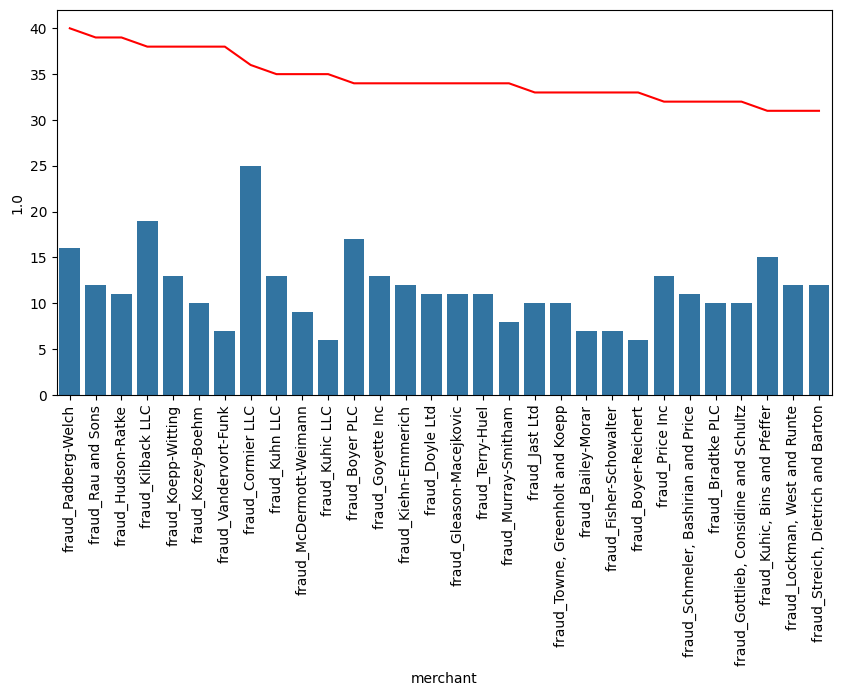

In [153]:
# check meharent
cc= pd.crosstab(df['merchant'] ,new_df['is_fraud']).sort_values(by=[1.0,0.0 ], ascending=False)
cc = cc[cc[1.0] > 30]
fig ,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='merchant' ,y=1.0  ,data=cc, ax=ax , color = 'red')
sns.barplot(x='merchant' ,y=0.0  ,data=cc, ax=ax )
plt.xticks(rotation = 90)
plt.show()
# it show there are a many of merhants that have high fraud cases 

In [134]:
new_df.columns


Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'hour_of_day', 'month_of_transaction', 'weekend',
       'merchant', 'category', 'gender', 'city', 'state', 'job', 'day_of_week',
       'time_of_day_segment', 'is_fraud', 'user_age', 'observed_age_group'],
      dtype='object')

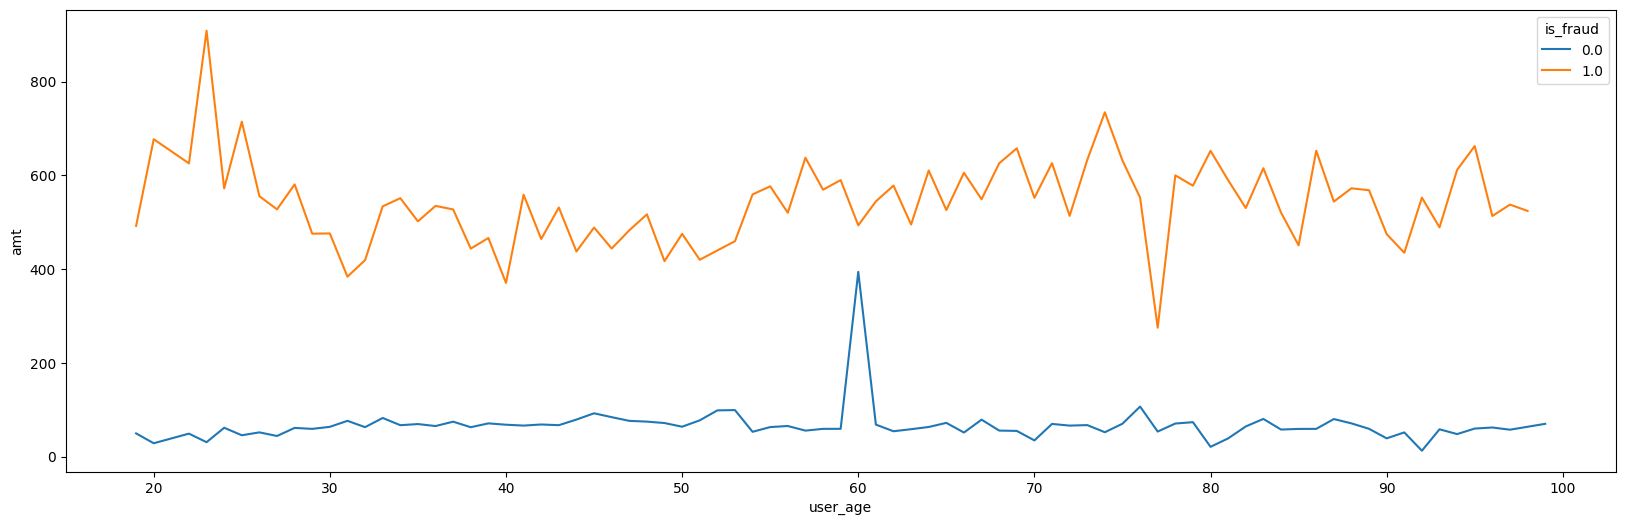

In [193]:

dd  = new_df.groupby(['user_age' , 'is_fraud'])['amt'].mean().reset_index().sort_values(by='amt' , ascending=False)
fig,ax = plt.subplots(figsize=(20,6))
sns.lineplot(x='user_age' , y='amt' ,hue='is_fraud', data=dd )
plt.show()

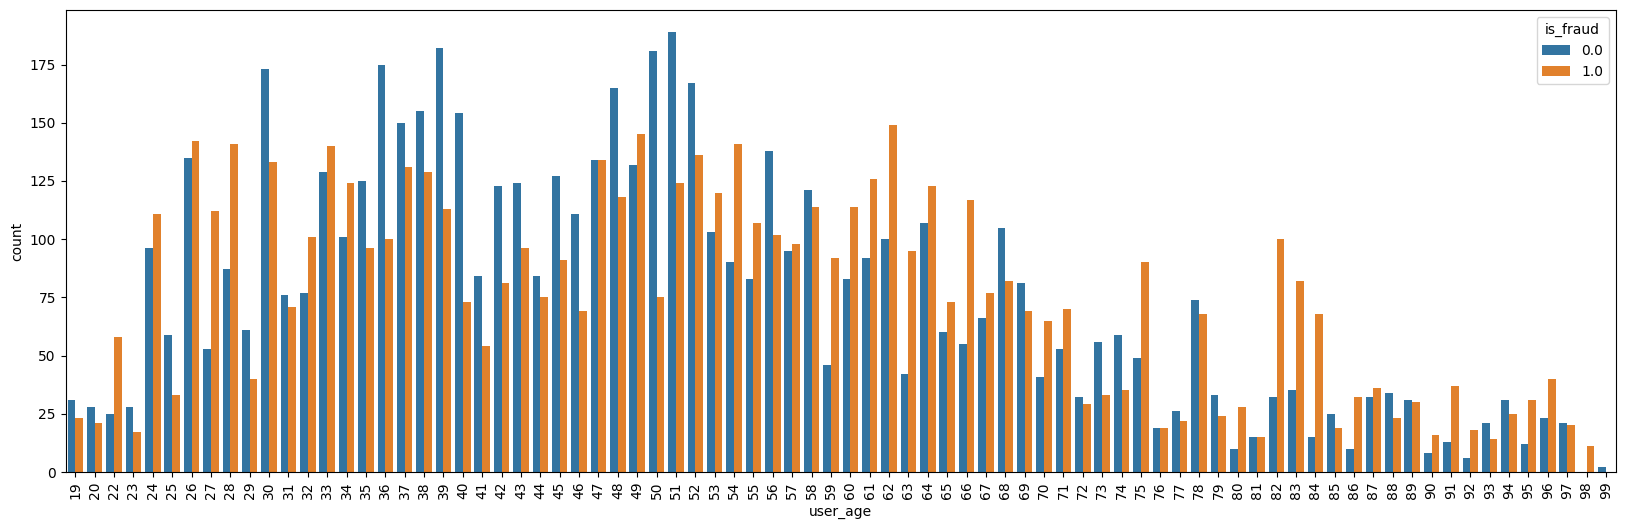

In [174]:
fig,ax = plt.subplots(figsize=(20,6))
sns.countplot(x='user_age' , data=new_df , hue='is_fraud')
plt.xticks(rotation = 90)
plt.show()

<h3>Model Creation & Model Evaluation</h3>

In [196]:
new_df.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,hour_of_day,month_of_transaction,...,category,gender,city,state,job,day_of_week,time_of_day_segment,is_fraud,user_age,observed_age_group
0,7.53,75662.0,32.3836,-94.8653,24536.0,1.350066e+09,32.202008,-94.371865,18.0,10.0,...,12,0,396,43,299,2,0,0.0,40,0
1,3.79,43160.0,39.5370,-83.4550,22305.0,1.327065e+09,39.156673,-82.930503,13.0,1.0,...,13,0,820,35,456,3,0,0.0,85,1
2,59.07,6365.0,41.5224,-71.9934,4720.0,1.332613e+09,41.657152,-72.595751,18.0,3.0,...,0,0,649,6,52,3,0,0.0,46,0
3,25.58,80824.0,39.6171,-102.4776,207.0,1.361805e+09,39.080346,-103.213452,15.0,2.0,...,10,1,402,5,308,5,0,0.0,68,1
4,84.96,49101.0,41.9488,-86.4913,3104.0,1.331076e+09,42.502065,-86.732664,23.0,3.0,...,10,0,49,22,230,6,1,0.0,42,0


In [197]:
from sklearn.model_selection import train_test_split
X = new_df.drop('is_fraud' , axis= 1)
y = new_df['is_fraud']
X_train , X_test , y_train , y_test = train_test_split(X,y , stratify=y , test_size=0.3 , random_state=42)
print(f"shape of X_train {X_train.shape} and y_train {y_train}")

shape of X_train (8408, 21) and y_train 1593    0.0
3866    0.0
3347    0.0
1916    0.0
434     0.0
       ... 
7166    1.0
5967    0.0
2893    0.0
7497    1.0
5449    0.0
Name: is_fraud, Length: 8408, dtype: float64


In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
print(X_scaled_train.shape , X_scaled_test.shape)

(8408, 21) (3604, 21)


In [200]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100 , criterion='entropy')
rf.fit(X_scaled_train ,y_train)
y_pred = rf.predict(X_scaled_test) 

In [201]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
print(f"accuracy score = {accuracy_score(y_test , y_pred)}")
print(f"confusion matrix = {confusion_matrix(y_test , y_pred)}")
print(f"classification report = {classification_report(y_test , y_pred)}")

accuracy score = 0.9614317425083241
confusion matrix = [[1742   60]
 [  79 1723]]
classification report =               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1802
         1.0       0.97      0.96      0.96      1802

    accuracy                           0.96      3604
   macro avg       0.96      0.96      0.96      3604
weighted avg       0.96      0.96      0.96      3604



In [214]:
# fune Hyper parameter tuning with grid search
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Assuming X_scaled_train and y_train are your scaled features and target labels
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Define the parameter distributions for random search
params = {
    'max_depth': [None] + list(np.random.randint(5, 21, size=10)),  # Example values for max_depth
    'min_samples_leaf': list(np.random.randint(1, 6, size=10)),      # Example values for min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2']                         # Example values for max_features
}

# Set the number of models to sample
number_of_models = 10

# Initialize RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=number_of_models,
                                   n_jobs=4, refit=True, return_train_score=True, cv=10, scoring='accuracy')

# Fit RandomizedSearchCV to the training data
randomized_cv.fit(X_scaled_train, y_train)

# Get the best hyperparameters and best score
best_hyperparameters = randomized_cv.best_params_
best_score = randomized_cv.best_score_

# Print the best hyperparameters and best score
print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Best accuracy score: {best_score}")

c:\Users\Mohamed Saad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mohamed Saad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mohamed Saad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Mohamed Saad\AppData\Local\Programs\Python\Python312\Lib\

Best hyperparameters: {'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16}
Best accuracy score: 0.9550431742256948


In [216]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=2 , max_features='sqrt'  , max_depth=16)
rf.fit(X_scaled_train ,y_train)
y_pred = rf.predict(X_scaled_test)

print(f"accuracy score = {accuracy_score(y_test , y_pred)}")
print(f"confusion matrix = {confusion_matrix(y_test , y_pred)}")
print(f"classification report = {classification_report(y_test , y_pred)}")

accuracy score = 0.9575471698113207
confusion matrix = [[1732   70]
 [  83 1719]]
classification report =               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1802
         1.0       0.96      0.95      0.96      1802

    accuracy                           0.96      3604
   macro avg       0.96      0.96      0.96      3604
weighted avg       0.96      0.96      0.96      3604



In [224]:
from sklearn.ensemble import GradientBoostingClassifier
rf = GradientBoostingClassifier()
rf.fit(X_scaled_train ,y_train)
y_pred = rf.predict(X_scaled_test)

print(f"accuracy score = {accuracy_score(y_test , y_pred)}")
print(f"confusion matrix = {confusion_matrix(y_test , y_pred)}")
print(f"classification report = {classification_report(y_test , y_pred)}")

accuracy score = 0.9633740288568258
confusion matrix = [[1737   65]
 [  67 1735]]
classification report =               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1802
         1.0       0.96      0.96      0.96      1802

    accuracy                           0.96      3604
   macro avg       0.96      0.96      0.96      3604
weighted avg       0.96      0.96      0.96      3604

